# Задание 1

## пункт 1, 2 (Импорт данных)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bill_authentication.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Метка класса

In [3]:
df['Class'].unique()

array([0, 1], dtype=int64)

## пункт 3 (Стандартизация)

In [4]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[['Variance', 'Skewness', 
                                    'Curtosis', 'Entropy']])
df[['Variance', 'Skewness', 
                        'Curtosis', 'Entropy']] = x
df

,Variance,Skewness,Curtosis,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


## пункт 4 (Получение обучающей выборки)

#### Выделение обучающей и тестовой выборки

In [5]:
# from sklearn.model_selection import train_test_split
# train_table, test_table = train_test_split(df, train_size = 4/6)

# test_table = test_table.reset_index()
# print(train_table, test_table)


from sklearn.model_selection import train_test_split
train_table, test_table = train_test_split(df, train_size = 4/6)

train_table = train_table.reset_index()
test_table = test_table.reset_index()
# print(train_table, test_table)

df_test_table = pd.DataFrame(test_table, columns = ['index', 'Variance', 'Skewness', 'Curtosis', 'Entropy','Class'])
df_train_table = pd.DataFrame(train_table, columns = ['index', 'Variance', 'Skewness', 'Curtosis', 'Entropy','Class'])

print('train_table:')
df_train_table

train_table:


,index,Variance,Skewness,Curtosis,Entropy,Class
0,1120,-1.274308,-1.618903,2.430143,0.291759,1
1,568,1.375841,0.239845,-0.130359,0.876662,0
2,1183,-1.410352,0.344585,-0.342755,-0.442159,1
3,291,-0.932192,1.711318,-0.306163,-3.139460,0
4,457,0.073341,0.205619,0.672090,0.875429,0
...,...,...,...,...,...,...
909,452,0.118768,1.221060,-0.609435,-0.146622,0
910,571,0.639740,-1.204136,0.671696,-0.027160,0
911,410,0.530405,-0.248656,0.754231,1.085375,0
912,1317,-0.598381,0.152712,-0.887470,-0.330696,1


In [6]:
print('test_table:')
df_test_table

test_table:


,index,Variance,Skewness,Curtosis,Entropy,Class
0,173,-0.546511,1.500748,0.161583,-2.122961,0
1,541,1.137676,0.405605,-0.194593,0.728279,0
2,103,1.022605,-1.114191,0.599907,0.454302,0
3,478,-0.778342,-0.181996,1.330562,0.580517,0
4,985,0.111673,-0.001066,-1.046181,0.469695,1
...,...,...,...,...,...,...
453,656,-0.631635,1.495106,0.070692,-0.814639,0
454,1152,-1.026571,-1.597392,1.276274,0.260358,1
455,379,1.352510,0.097691,-0.211697,0.739364,0
456,940,-0.086235,-0.208095,-0.443186,0.570050,1


## пункт 5 (Дерево классификации)

### Построение дерева и визуализация
#### Метод 1

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

def MakingTree(crit, alpha):
    clf = tree.DecisionTreeClassifier(criterion = crit, ccp_alpha = alpha)
    clf.fit(train_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']], train_table[['Class']])

    tree.plot_tree(clf,filled = True, rounded = True)
    plt.show
    
    # Классифицируем тестовую выборку и находим процент совпадения
    res = clf.predict(test_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']])
    test_table2 = test_table.copy()
    test_table2['new_class'] = pd.Series(res)
    good = test_table2[test_table2['new_class'] == test_table2['Class']]
    good_size = good['Variance'].count()
    all_size = test_table2['Variance'].count()
    print(good_size/all_size * 100)
    print(clf.score(test_table[['Variance', 'Skewness', 'Curtosis', 'Entropy']], test_table[['Class']]))

#### Неопределенность Джини

96.72489082969432
0.9672489082969432


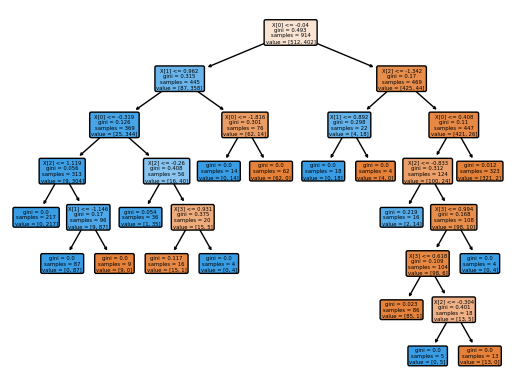

In [8]:
MakingTree('gini', 0.005)

92.79475982532752
0.9279475982532751


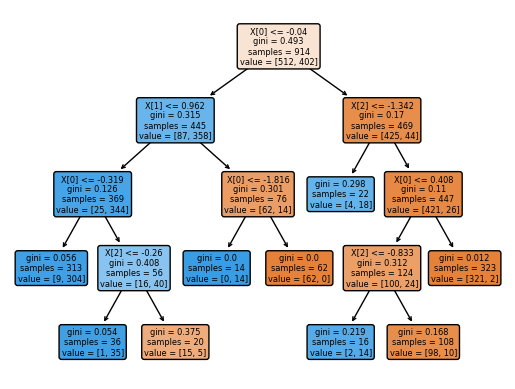

In [9]:
MakingTree('gini', 0.01)

91.48471615720524
0.9148471615720524


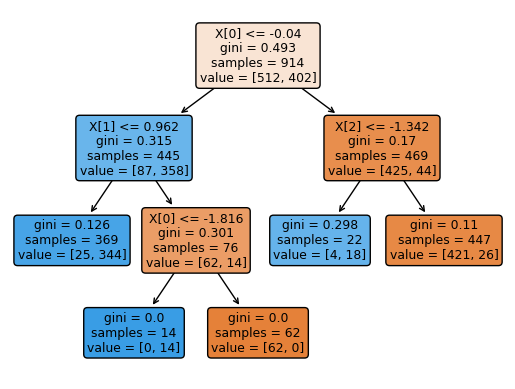

In [10]:
MakingTree('gini', 0.015)

91.48471615720524
0.9148471615720524


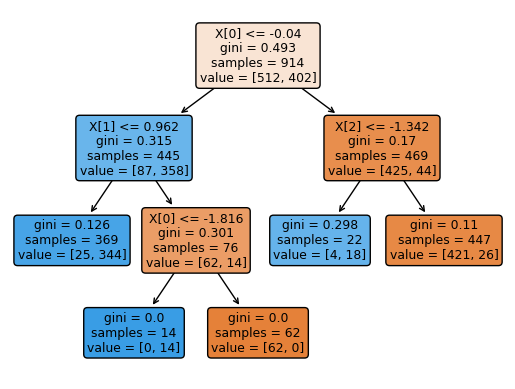

In [11]:
MakingTree('gini', 0.02)

90.17467248908298
0.9017467248908297


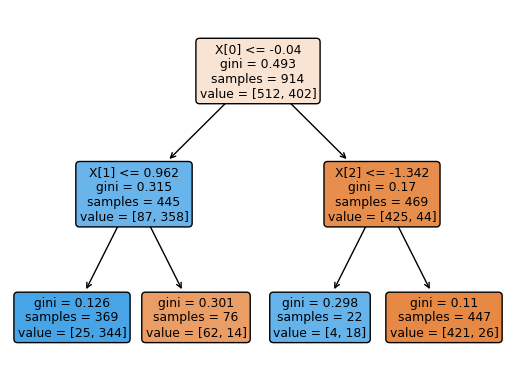

In [12]:
MakingTree('gini', 0.025)

88.42794759825327
0.8842794759825328


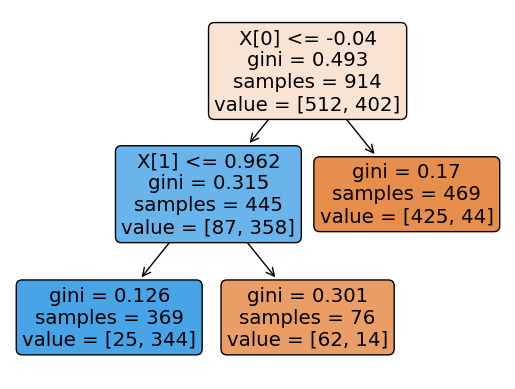

In [13]:
MakingTree('gini', 0.03)

88.42794759825327
0.8842794759825328


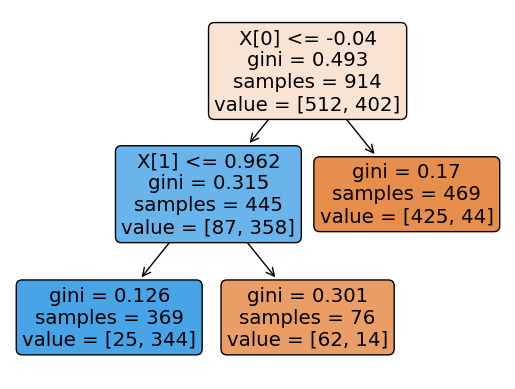

In [14]:
MakingTree('gini', 0.035)

### Данное дерево ('gini', 0.035) является оптимальным, т.к. оно не переобучается

84.71615720524017
0.8471615720524017


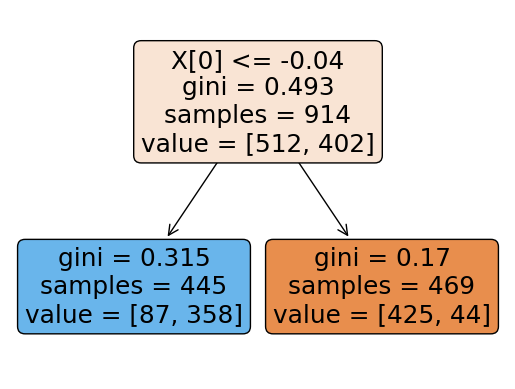

In [15]:
MakingTree('gini', 0.2)

54.58515283842795
0.5458515283842795


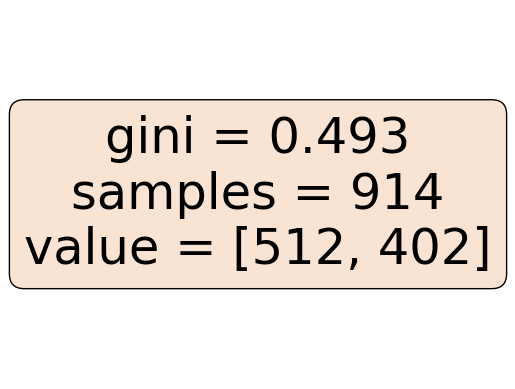

In [16]:
MakingTree('gini', 0.8)

#### Энтропия Шенона

98.2532751091703
0.982532751091703


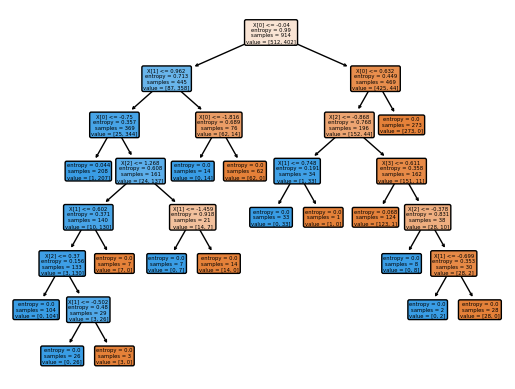

In [17]:
MakingTree('entropy', 0.005)

97.59825327510917
0.9759825327510917


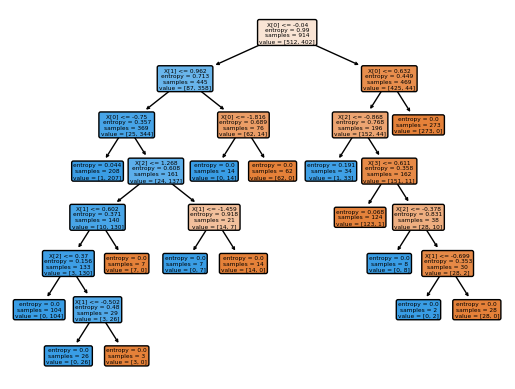

In [18]:
MakingTree('entropy', 0.01)

97.59825327510917
0.9759825327510917


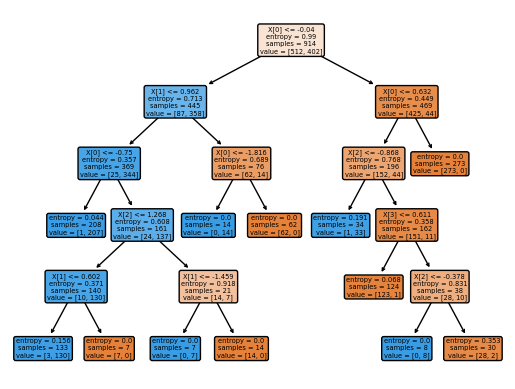

In [19]:
MakingTree('entropy', 0.015)

97.59825327510917
0.9759825327510917


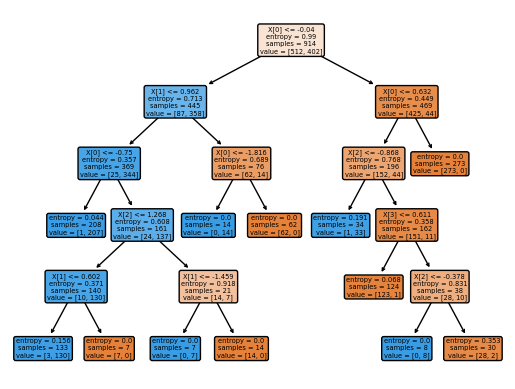

In [20]:
MakingTree('entropy', 0.02)

95.85152838427948
0.9585152838427947


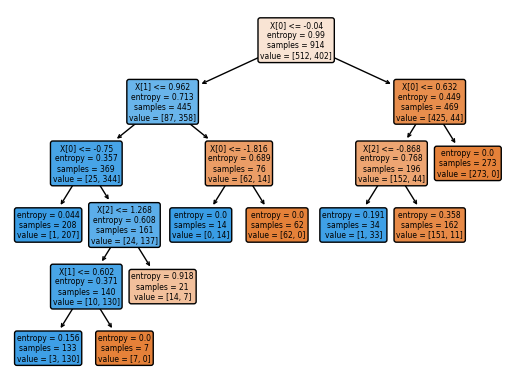

In [21]:
MakingTree('entropy', 0.025)

95.85152838427948
0.9585152838427947


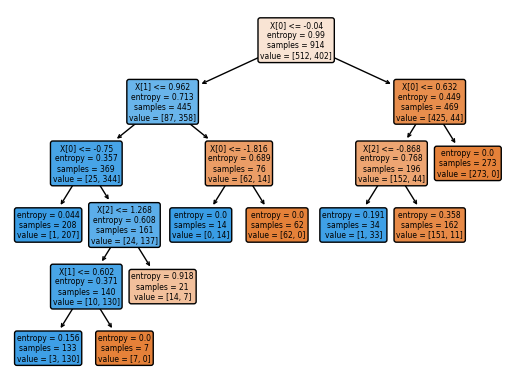

In [22]:
MakingTree('entropy', 0.03)

92.57641921397381
0.925764192139738


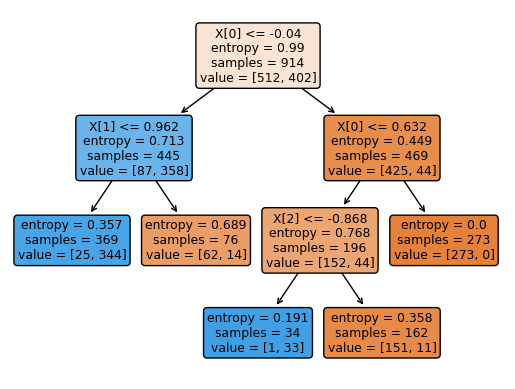

In [23]:
MakingTree('entropy', 0.075)

### Данное дерево ('entropy', 0.06) является оптимальным, т.к. оно не переобучается

84.71615720524017
0.8471615720524017


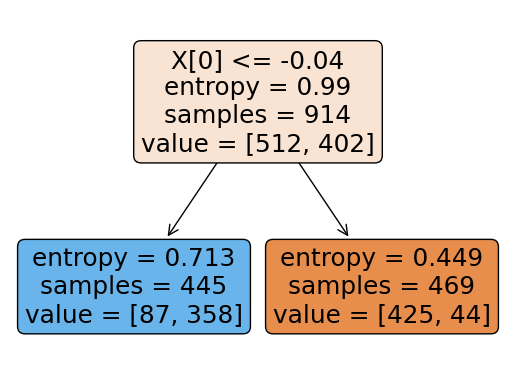

In [24]:
MakingTree('entropy', 0.2)

54.58515283842795
0.5458515283842795


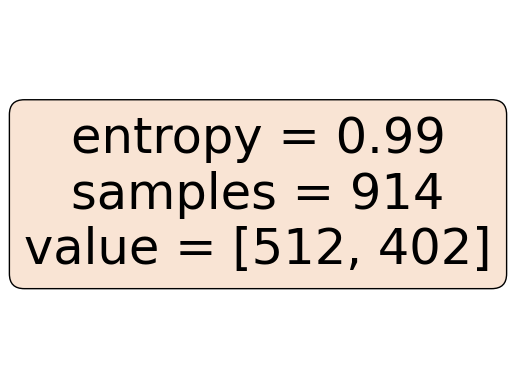

In [25]:
MakingTree('entropy', 0.8)

# Задание 2

## пункт 1, 2 (Импорт данных)

In [26]:
import pandas as pd

In [27]:
df1 = pd.read_csv('winequality-white.csv')
df1

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Метка класса

In [28]:
df1['Quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

## пункт 3 (Стандартизация)

In [29]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])

df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']] = x
df1

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,6
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,5
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,6
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,7


## пункт 4 (Получение обучающей выборки)

In [30]:
from sklearn.model_selection import train_test_split
train_table, test_table = train_test_split(df1, train_size = 4/6)

train_table = train_table.reset_index()
test_table = test_table.reset_index()
# print(train_table, test_table)

df_test_table = pd.DataFrame(test_table, columns = ['index', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol','Quality'])
df_train_table = pd.DataFrame(train_table, columns = ['index', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol','Quality'])

print('test_table:')
df_test_table

test_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,2033,0.409125,-0.478657,-0.034638,1.243919,0.147747,0.863956,1.050493,1.562436,1.468577,-0.787342,-0.580471,5
1,794,0.646153,0.414339,-0.530476,-0.984201,0.147747,0.158298,0.815164,-0.226502,-1.048226,0.264236,-0.986812,5
2,2878,-1.131557,0.414339,-0.034638,-0.846176,-0.859314,-0.018117,-0.008487,-1.530587,1.203650,-0.612079,1.776304,6
3,1927,0.290611,-0.280214,-0.447836,-0.944765,0.285074,0.628736,0.721032,-0.477287,-0.915763,-0.699710,-0.011595,5
4,673,-0.183445,0.315117,-0.282557,-0.846176,-0.355784,-1.017799,-0.196750,-0.410411,1.137419,1.228183,0.069674,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,933,-1.131557,0.116674,-0.034638,0.198872,-0.401559,1.334395,1.568216,0.308508,0.475102,-0.699710,-0.743008,5
1629,1618,-0.538987,0.910449,1.287594,1.362226,-0.035355,1.040370,2.462466,1.395246,-0.319678,-0.086290,-1.636957,6
1630,4265,-0.776015,0.811227,-0.943673,-0.225063,-0.355784,0.511127,0.156243,-0.731417,0.210175,-0.787342,0.557282,6
1631,2145,0.409125,-0.776323,-0.199917,0.711536,0.376625,0.805151,0.626901,0.993988,1.402345,-0.612079,-0.499203,6


In [31]:
print('train_table:')
df_train_table

train_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,1318,-0.538987,-1.272432,-0.199917,-1.043355,-0.081131,-0.606165,-0.996869,-0.276659,2.329589,0.176605,-0.174131,6
1,4117,-0.776015,0.712005,-1.108952,2.308684,1.063257,-0.135727,0.462170,1.689501,-0.253446,0.088973,-1.393152,6
2,2630,-1.131557,1.654612,-0.613115,-0.984201,-0.859314,-0.723775,-0.690941,-0.851794,0.740029,-1.137868,-0.011595,6
3,2178,0.883181,0.414339,2.031350,2.042493,0.193523,0.452322,0.579835,1.963693,-0.253446,0.439499,-1.068080,5
4,2677,-0.776015,-0.280214,-0.199917,-0.629279,-0.721988,-0.194531,0.273907,-1.299864,-0.054751,-1.576026,1.207427,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,2931,-1.961155,-1.222821,-0.034638,-0.944765,-0.813539,-1.311824,-1.867585,-1.430273,0.740029,3.068445,1.126159,8
3261,1479,1.001695,-1.173210,1.287594,-0.865894,0.468176,-0.900190,-0.337948,0.258351,0.872492,0.001342,0.150942,6
3262,1437,1.594265,-0.974766,1.287594,-1.043355,-0.584661,-0.429751,-1.349862,-0.577602,-1.246921,1.666341,-0.092863,7
3263,2809,-1.250071,0.414339,-0.199917,-0.727869,0.147747,-0.606165,0.344506,-1.122643,1.667272,2.104498,1.369963,7


In [109]:
df_train_table, df_test_table = train_test_split(df1, train_size = 4/6)
clf_df1 = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.006)
clf_df1.fit(df_train_table[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']], df_train_table[['Quality']])
print(clf_df1.score(df_train_table[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']], df_train_table[['Quality']]))

0.5332312404287902


<function matplotlib.pyplot.show(close=None, block=None)>

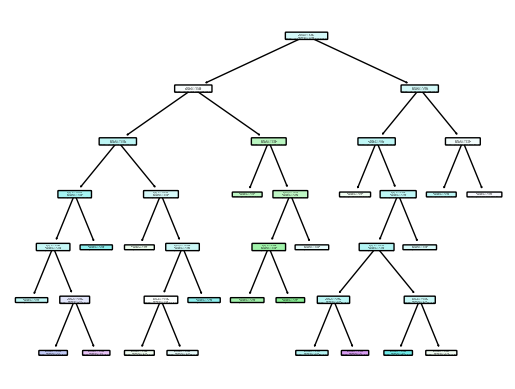

In [110]:
tree.plot_tree(clf_df1, filled = True, rounded = True)
plt.show

## пункт 5 (МГК) + пункт 6 (Построение деревьев решений)

In [32]:
from sklearn.decomposition import PCA

pca = PCA()
table_pca = pca.fit_transform(df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])

explained_variance_ratio = pca.explained_variance_ratio_
print("Дисперсия:")
print(explained_variance_ratio)
print("Суммарная дисперсия:")
sum_disp = pca.explained_variance_ratio_.cumsum()
print (sum_disp)
explained_variance = pca.explained_variance_
print("Собственные значения:")
print(explained_variance)

comp = pca.components_

Дисперсия:
[0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]
Суммарная дисперсия:
[0.29293217 0.4361358  0.54719683 0.63978977 0.72827474 0.81361487
 0.87966924 0.93415637 0.9718058  0.99812281 1.        ]
Собственные значения:
[3.2229119  1.57556161 1.22192081 1.01873034 0.97353334 0.93893321
 0.7267464  0.59948087 0.41422824 0.28954625 0.0206533 ]


#### Метод 1 - уровень информативности 95%

In [69]:
for i in range(0, 10):
    if (sum_disp[i] > 0.95):
        print('Достаточно', i, 'главных компонент для информативности 95%')
        n = i
        break;

Достаточно 8 главных компонент для информативности 95%


In [70]:
pca = PCA(n_components = n)
table_pca = pca.fit_transform(df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])
table_pca_inform = pca.transform(df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])
table_inform = pd.DataFrame(table_pca_inform, columns = ['pc1','pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
table_inform['Quality'] = df1['Quality']
table_inform

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,Quality
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,6
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,6
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,6
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,6
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,6
...,...,...,...,...,...,...,...,...,...
4893,-2.094367,0.390789,0.325364,0.088145,-0.755337,-0.283772,-0.108921,-0.148646,6
4894,1.295014,0.490753,-0.066307,-0.381234,0.267347,0.839791,0.033669,-0.157898,5
4895,-0.779731,-0.408480,-0.664677,-0.134766,-0.808279,0.133791,-1.616482,-0.278473,6
4896,-3.407302,0.915744,-0.268297,-0.762126,-0.080705,0.497135,0.978533,-0.165963,7


In [105]:
train_table_inform, test_table_inform = train_test_split(table_inform, train_size = 4/6)
clf_inform = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.006)
clf_inform.fit(train_table_inform[['pc1','pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8']], train_table_inform[['Quality']])
print(clf_inform.score(train_table_inform[['pc1','pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8']], train_table_inform[['Quality']]))

0.5421133231240429


<function matplotlib.pyplot.show(close=None, block=None)>

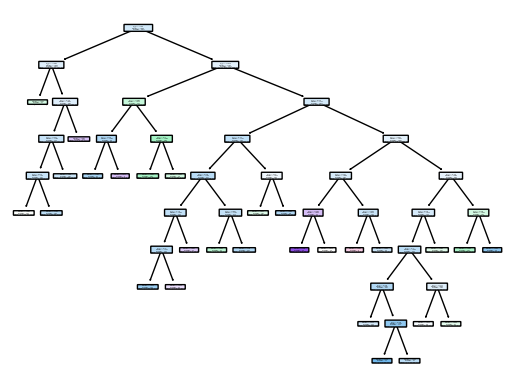

In [106]:
tree.plot_tree(clf_inform,filled = True, rounded = True)
plt.show

#### Метод 2 - метод Кайзера

In [83]:
m = 0
for i in range(0, 11):
    if (explained_variance[i] >= 1):
        m += 1
    else:
        break
        
print(f'Значения больше 1 имеют {m} главных компонент')

Значения больше 1 имеют 4 главных компонент


In [84]:
pca = PCA(n_components = m)
table_pca = pca.fit_transform(df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])
table_pca_kaiser = pca.transform(df1[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
                                 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']])
table_kaiser = pd.DataFrame(table_pca_kaiser, columns = ['pc1','pc2', 'pc3','pc4'])
table_kaiser['Quality'] = df1['Quality']
table_kaiser

,pc1,pc2,pc3,pc4,Quality
0,3.676944,-0.545233,-0.930422,-1.135374,6
1,-0.644588,0.430770,-0.356331,0.999117,6
2,0.155291,-1.189800,-0.017532,0.270219,6
3,1.455374,0.099680,-0.001956,-0.423022,6
4,1.455374,0.099680,-0.001956,-0.423022,6
...,...,...,...,...,...
4893,-2.094367,0.390789,0.325364,0.088145,6
4894,1.295014,0.490753,-0.066307,-0.381234,5
4895,-0.779731,-0.408480,-0.664677,-0.134766,6
4896,-3.407302,0.915744,-0.268297,-0.762126,7


In [107]:
train_table_kaiser, test_table_kaiser = train_test_split(table_kaiser, train_size = 4/6)
clf_kaiser = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.006)
clf_kaiser.fit(train_table_kaiser[['pc1','pc2', 'pc3','pc4']], train_table_kaiser[['Quality']])
print(clf_kaiser.score(train_table_kaiser[['pc1','pc2', 'pc3','pc4']], train_table_kaiser[['Quality']]))

0.5218989280245023


<function matplotlib.pyplot.show(close=None, block=None)>

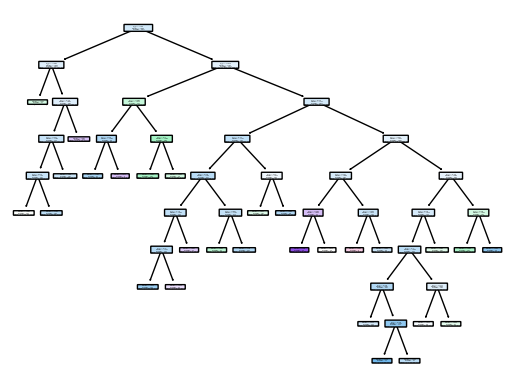

In [108]:
tree.plot_tree(clf_inform,filled = True, rounded = True)
plt.show

## пункт 7 (Выводы)

#### Для всех трех вариантов был выбран один метод (Энтропия Шенона, равная 0.6%) для наилучшего сравнения деревьев между собой:
#### Для модели (без МГК) процент совпадения = 0.5332312404287902
#### Для модели (после МГК по 95% уровню информативности - 8 компонент) процент совпадения = 0.5421133231240429
#### Для модели (после МГК по методу Кайзера - 4 компоненты) процент совпадения = 0.5218989280245023
#### Соответственно, наилучшей оказалась модель после МГК по 95% уровню информативности - 8 компонент